## AIR POLLUTION DATA ANALYSIS - INDIA

**AIR POLLUTION** refers to the release of **pollutants** into the **air** that are detrimental to human health and the planet as a whole.

Today air pollution has been one of the major problems to deal with for any nation. In South Asia it is ranked as the sixth most dangerous killer.
One does not really realize the harmful effects of a problem if he/she has not experienced it in the first place.

Take Delhi for instance, we all have experienced what it feels like inhaling in the ‘deadly’ smog that remained for about a week, after Diwali. Citizens were advised not to leave their homes, and were asked to wear masks whenever going outside. Looking outside the window made me feel like I was living in a *gas chamber*. Low visibility, high number of deaths etc were the effects of pollution.

Being a data analysis and data science enthusiast I decided to analyze the air quality data of my own country to find some underlying principles or patterns which might give me an insight of how severe the problem really is and I must say the results were worth sharing. So, here I am writing this noteboook to share my approach and what I analyzed from the data and to also make people aware of the colossal problem our country is facing.

In [1]:
# Importing the libraries

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the data

dataset = pd.read_csv('data.csv', encoding = 'latin1')
df = dataset.copy()

In [4]:
# Getting the top values

df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
# Getting the basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [6]:
# Replacing the null values with the mean value

df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
# Replacing the Value of Uttaranchal to Uttarakhand

replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [8]:
# Return a Series of Agency containing counts of unique values

df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
Kerala State Pollution Control Board                                      13782
Rajasthan State Pollution Control Board                                   13500
Assam State Pollution Control Board                                       13427
West Bengal State Pollution Control Board                                 12044
National Environmental Engineering Research Institute                     11652
Tamilnadu State Pollution Control Board                                   11498
Odisha State Pollution Control Board                                      11226
Karnataka State Pollution Control Board 

In [9]:
# Return a Series of Type containing counts of unique values

df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [10]:
# Deleting all values which have null in Type, location and SO2 attribute

df = df.dropna(axis = 0, subset = ['type'])
df = df.dropna(axis = 0, subset = ['location'])
df = df.dropna(axis = 0, subset = ['so2'])

In [11]:
# Replacing the null values with the mean value

df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [12]:
# Not interested in Agency, Location Monitoring Station, STN_Code, Sampling Date

del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [13]:
# Dataset after deleting the above columns

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [14]:
# Changing the Type to only 3 Categories (Residential, Industrial, Other)

a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

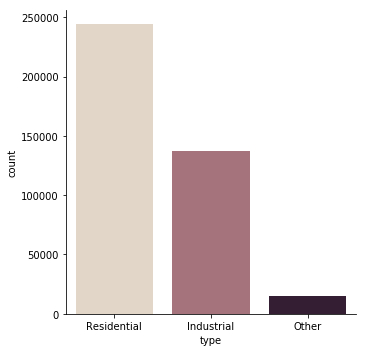

In [15]:
# Observations belonging to each location

sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

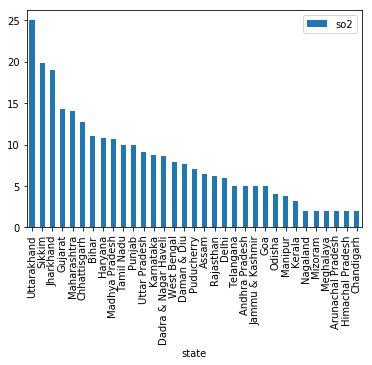

In [16]:
# Bar Plot of SO2 vs State in Descending Order

df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

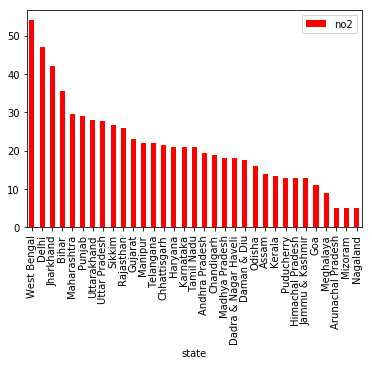

In [17]:
# Bar Plot of NO2 vs State in Descending Order

df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

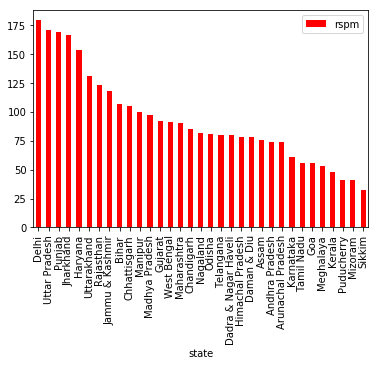

In [18]:
# RSPM = PM10

df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

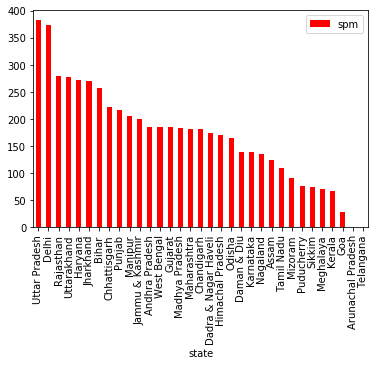

In [19]:
# SPM

df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

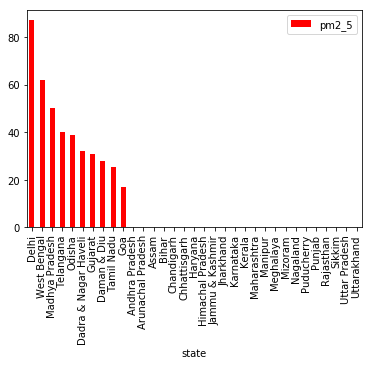

In [20]:
# PM2.5

df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


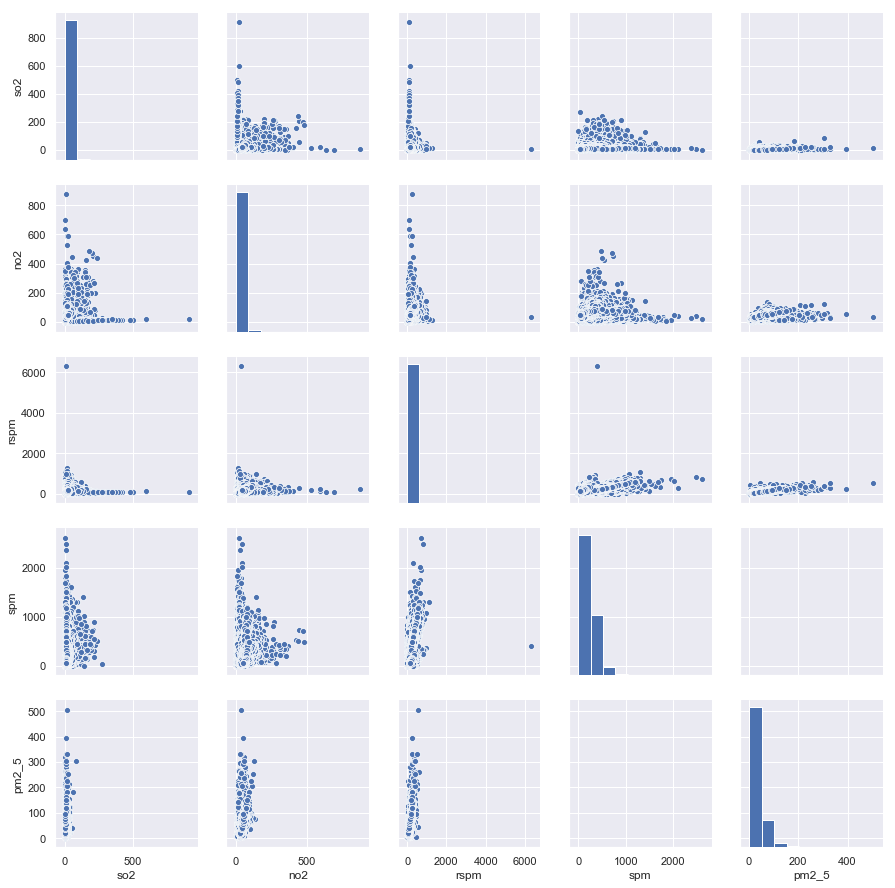

In [21]:
# Scatter Plots of all columns (SO2, NO2, RSPM, SPM, PM2.5)

sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

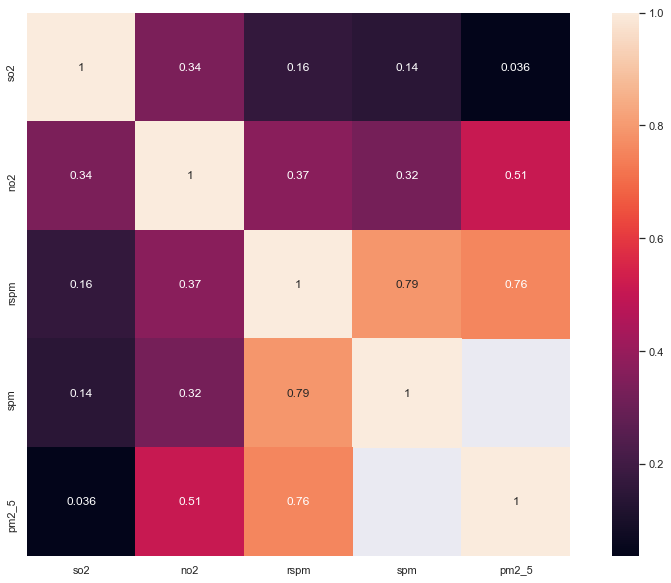

In [22]:
# Correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [24]:
# Creating an year column

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

In [25]:
# Getting the top values

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


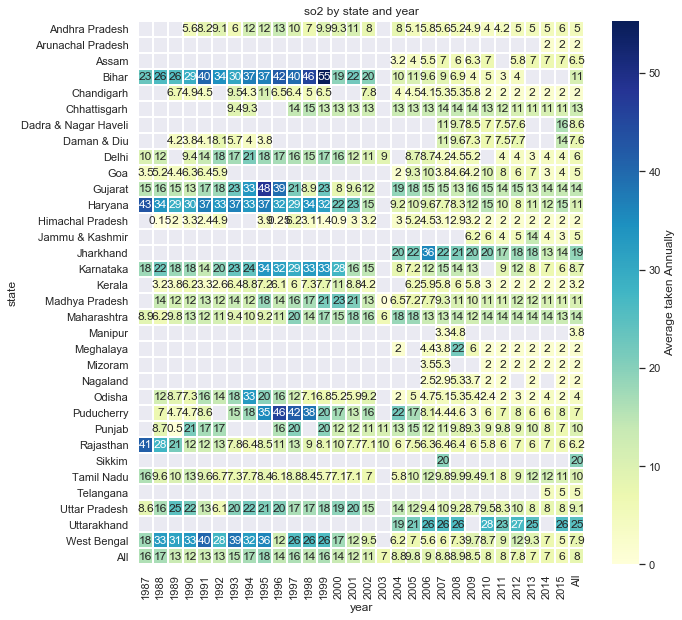

In [26]:
# Heatmap Pivot with State as Row, Year as Col, NO2 as Value

f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})


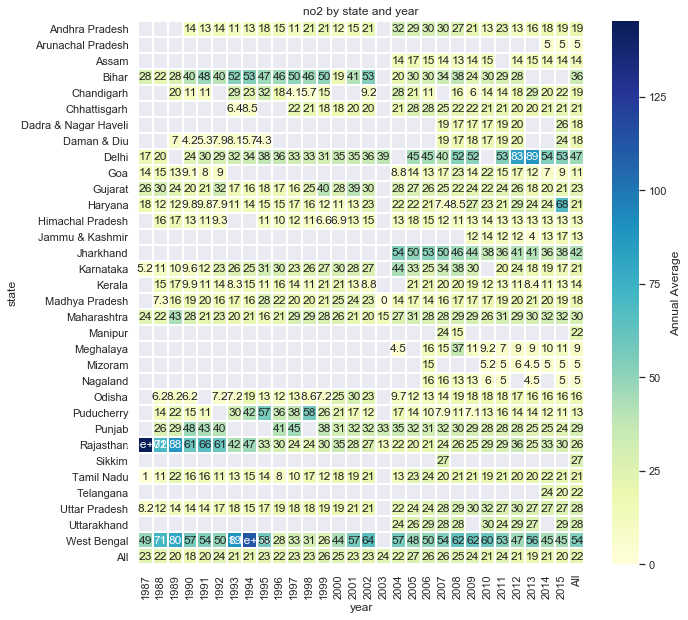

In [27]:
# Heatmap Pivot with State as Row, Year as Col, SO2 as Value

f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


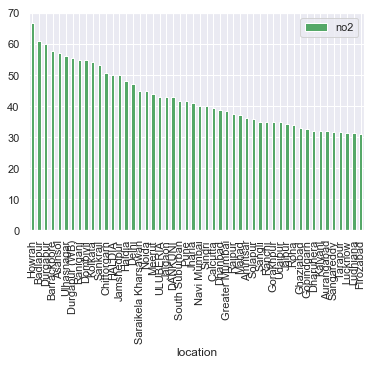

In [28]:
# Bar Plot of NO2 vs location in Descending order - First 50

df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

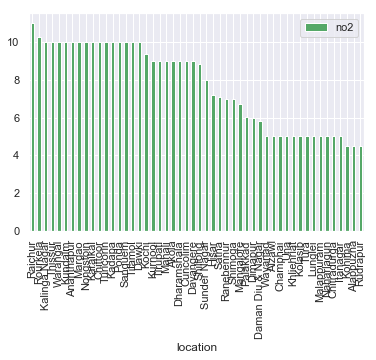

In [29]:
# Bar Plot of NO2 vs location in Descending order - Last 50

df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

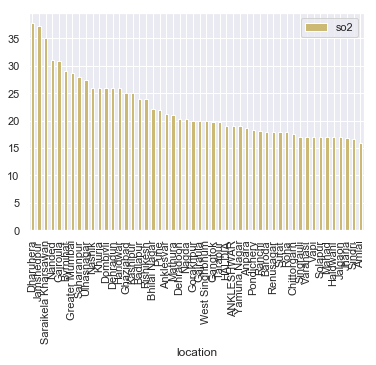

In [30]:
# Bar Plot of SO2 vs location in Descending order - First 50

df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

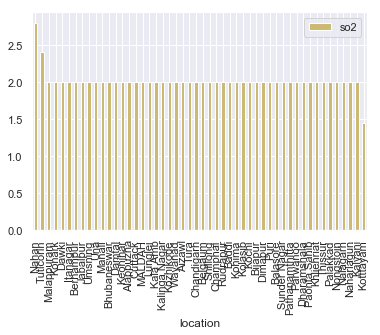

In [31]:
# Bar Plot of SO2 vs location in Descending order Last 50

df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

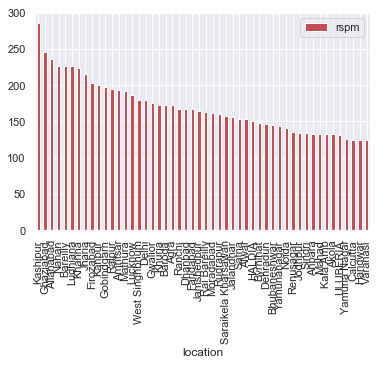

In [32]:
# RSPM = PM10 - Location Wise - First 50

df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

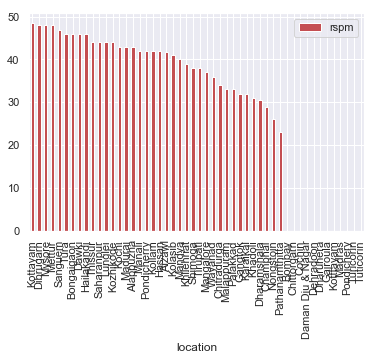

In [33]:
# RSPM = PM10 - Location Wise - Last 50

df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

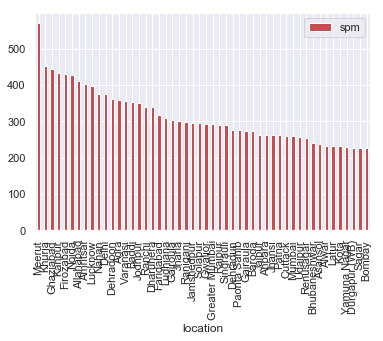

In [34]:
# SPM = PM10 - Location Wise - First 50

df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

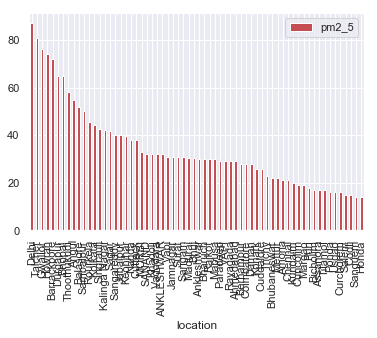

In [35]:
# PM2.5 vs Location - All Non Null Values

df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

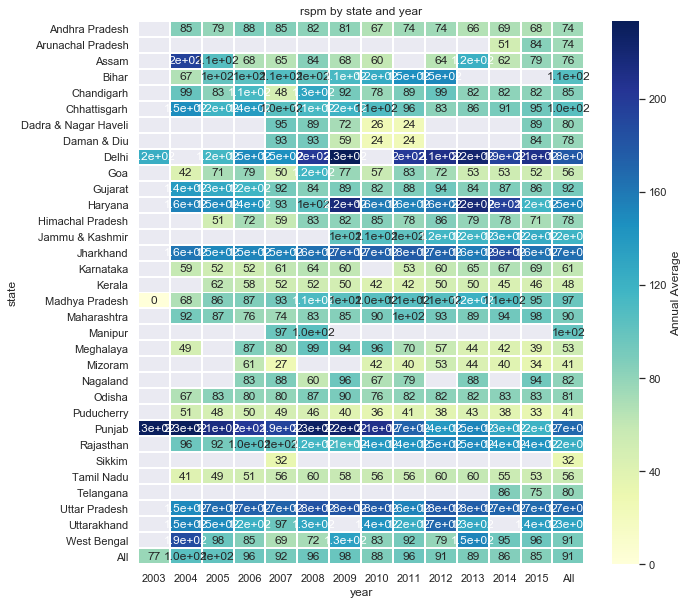

In [36]:
# Heatmap of RSPM

f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})


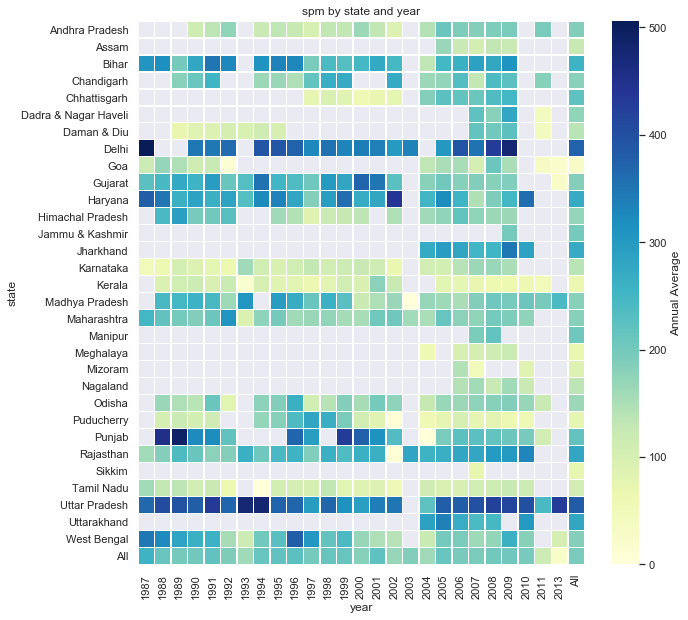

In [37]:
# Heatmap of SPM

f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

## Conclusion

From the above analysis we see that the majorly affected states in India by air pollution belong to the northern region.States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require immediate action.
We also saw that even if a state had high level of pollutants there were some regions in the states that were not polluted.

We also see from statistical analysis — scatter plots that the states with high rspm concentrations also have high spm concentrations.

From the heatmap we conclude that some states were heavily polluted in the early stages(1980 to 2000) but, later, were taken care.
The reason for the decrease could be awareness in citizens and government policies.